In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [2]:
# Set up hyper parameters 
c = 10
layer_dims = [7, c] 
learning_rate = 0.001
keep_prob = 1.0
num_epochs = 100
minibatch_size = 64
print_summary = False
isBinary = c <= 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)
print(hyperparams)

{'layer_dims': [7, 10], 'keep_prob': 1.0, 'learning_rate': 0.001, 'num_epochs': 100, 'minibatch_size': 64}


In [3]:
# Generate data
m = 333
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x)
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m))[0]
else:
    y_test = np.random.randint(c, size=(1, m))[0]

df = pd.DataFrame(x_data)
df[label] = y_test
df = df.astype('float32')
classification = len(set(y_test))
print(classification)

10


train_x.shape: (233, 100)
train_y.shape: (233,)
dev_x.shape: (100, 100)
dev_y.shape: (100,)
Done splitting data
10-class classification neural network with hyperparameters:
layer_dims: [7, 10] dropoutKeepProb: 1.0 learning_rate: 0.001 num_epochs: 100 minibatch_size: 64
Init Params
Training underway...
Cost after epoch 0: 3.568310
Cost after epoch 20: 2.942821
Cost after epoch 40: 2.528289
Cost after epoch 60: 2.287046
Cost after epoch 80: 2.090912
(100,)
(100,)


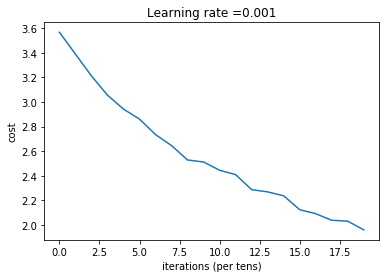

train_accuracy : 0.158798
test_accuracy : 0.09
precision : 0.09
recall : 0.09
f1score : 0.09
Done training!



In [4]:
# Example of using dnn.train_with_hyperparameter_bundle
nn = DNN(hyperparams)
model = nn.split_data_and_train(df, label, split_percent=0.7)
# parameters = model[dnn.KEY_PARAMETERS]